In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

income = pd.read_csv("../Data/income.csv")

income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


In [2]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [3]:
X_train, X_test, y_train, y_test = income_model_prep(income) 

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression(max_iter=5000)

lr.fit(X_train, y_train)

print(f"Accuracy: {lr.score(X_test, y_test)}")
print(f"F1: {f1_score(y_test, lr.predict(X_test))}")

Accuracy: 0.8544402751719825
F1: 0.6654689184333453


In [5]:
class_weight="balanced"

class_weight = {1:4, 0:1}

## Assignment 1: Sampling Methods

The following steps can be done one by one or in a single cell.

1. Undersample the data to a 2:1 ratio of 0s to 1s and fit a logistic regression - generate a confusion matrix and calculate common evaluation metrics (Accuracy, Precision Recall, F1). 

2. Oversample the data using random oversampling.Create 4x the the current number of 1s. and fit a logistic regression - generate a confusion matrix and calculate common evaluation metrics. 

3. Use SMOTE to oversample the data. Create 4x the the current number of 1s. Fit a logistic regression and generate a confusion matrix, as well as calculate common evaluation metrics. 

4. Which model sampling approach best for this data? Pick the one that gave the best performance at the default threshold, then tune the threshold and report optimized F1 score.

In [6]:
import imblearn.over_sampling as OS
import imblearn.under_sampling as US

logreg = LogisticRegression(max_iter=5000)

lr = logreg.fit(X_train, y_train)

# randomly undersample negative samples: 
RUS = US.RandomUnderSampler(
                   sampling_strategy = 1 / 2,
                   random_state=2023
)

X_train_us, y_train_us = RUS.fit_resample(X_train, y_train)

lr_us = logreg.fit(X_train_us, y_train_us)

# Oversampling
# create 4x as many positive samples

n_pos = y_train.sum()
n_neg = len(y_train) - n_pos
ratio = {1 : n_pos * 4, 0 : n_neg}

# randomly oversample positives
ROS = OS.RandomOverSampler(
    sampling_strategy = ratio,
    random_state=2023
)

X_train_os, y_train_os = ROS.fit_resample(X_train, y_train)

lr_os = logreg.fit(X_train_os, y_train_os)


# SMOTE oversampling for positives
smt = OS.SMOTE(
    sampling_strategy = ratio,
    random_state=2023
)

X_train_smt, y_train_smt = smt.fit_resample(X_train, y_train)

lr_smt = logreg.fit(X_train_smt, y_train_smt)



# Training Accuracy

print(f"Normal Accuracy: {lr.score(X_train, y_train)}")
print(f"Undersample Accuracy: {lr_us.score(X_train_us, y_train_us)}")
print(f"Oversample Accuracy: {lr_os.score(X_train_os, y_train_os)}")
print(f"SMOTE Accuracy: {lr_smt.score(X_train_smt, y_train_smt)}")

Normal Accuracy: 0.8194433586115237
Undersample Accuracy: 0.8086839266450917
Oversample Accuracy: 0.7801550247042291
SMOTE Accuracy: 0.8763428675037397


In [7]:
from sklearn.metrics import precision_score, recall_score, f1_score

print(f"Normal Precision: {precision_score(y_train, lr.predict(X_train))}")
print(f"Undersample Precision: {precision_score(y_train_us, lr_us.predict(X_train_us))}")
print(f"Oversample Precision: {precision_score(y_train_os, lr_os.predict(X_train_os))}")
print(f"SMOTE Precision: {precision_score(y_train_smt, lr_smt.predict(X_train_smt))}")

Normal Precision: 0.6040527929609385
Undersample Precision: 0.7047752372064084
Oversample Precision: 0.8583015267175572
SMOTE Precision: 0.8821615616568799


In [8]:
print(f"Normal Recall: {recall_score(y_train, lr.predict(X_train))}")
print(f"Undersample Recall: {recall_score(y_train_us, lr_us.predict(X_train_us))}")
print(f"Oversample Recall: {recall_score(y_train_os, lr_os.predict(X_train_os))}")
print(f"SMOTE Recall: {recall_score(y_train_smt, lr_smt.predict(X_train_smt))}")

Normal Recall: 0.7331715210355987
Undersample Recall: 0.7331715210355987
Oversample Recall: 0.7277508090614887
SMOTE Recall: 0.8994336569579288


In [9]:
print(f"Normal F1: {f1_score(y_train, lr.predict(X_train))}")
print(f"Undersample F1: {f1_score(y_train_us, lr_us.predict(X_train_us))}")
print(f"Oversample F1: {f1_score(y_train_os, lr_os.predict(X_train_os))}")
print(f"SMOTE F1: {f1_score(y_train_smt, lr_smt.predict(X_train_smt))}")

Normal F1: 0.6623784811051824
Undersample F1: 0.718692997065588
Oversample F1: 0.7876532399299475
SMOTE F1: 0.8907138851053601


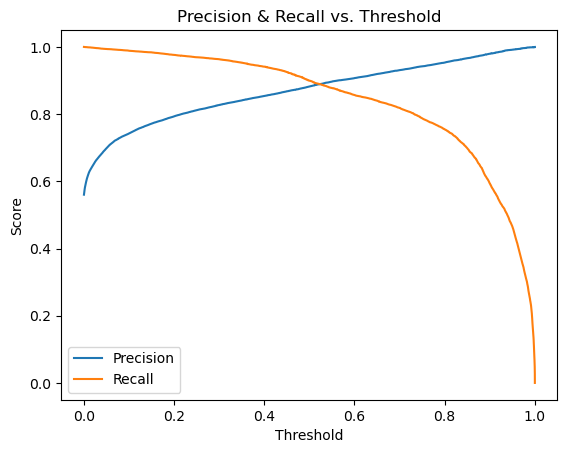

In [10]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split

p_curve, r_curve, t_curve = precision_recall_curve(y_train_smt, lr_smt.predict_proba(X_train_smt)[:,1])

import matplotlib.pyplot as plt

plt.plot(t_curve, p_curve[:-1], label='Precision')
plt.plot(t_curve, r_curve[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.legend()
plt.title('Precision & Recall vs. Threshold')
plt.show()

<Axes: >

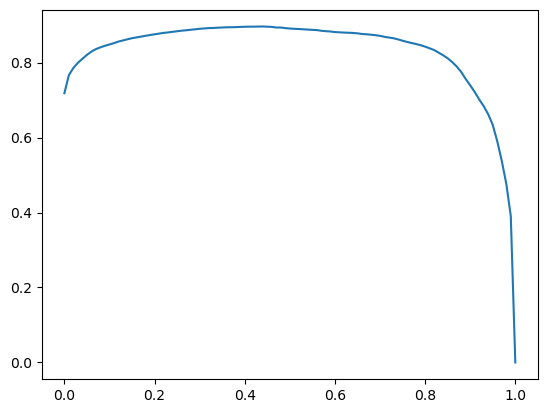

In [11]:
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr_smt.predict_proba(X_train_smt)[:,1]>thresh)
    f1.append(f1_score(y_train_smt, y_pred))
    
sns.lineplot(x=thresholds, y=f1)


In [12]:
thresh = thresholds[f1.index(max(f1))]

thresh

0.44

In [13]:
print(f"SMOTE F1: {f1_score(y_train_smt, lr_smt.predict_proba(X_train_smt)[:, 1] > thresh)}")

SMOTE F1: 0.8961818961818961


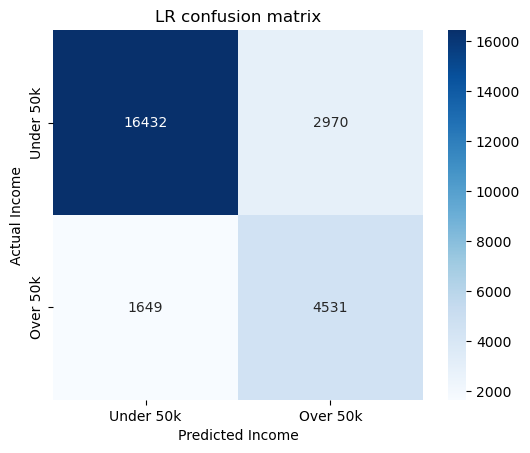

In [15]:
from sklearn.metrics import confusion_matrix

lr_confusion = confusion_matrix(y_train, lr.predict(X_train))
# plt.figure(dpi=150)
sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Under 50k", "Over 50k"],        
    yticklabels=["Under 50k", "Over 50k"]
)

plt.xlabel('Predicted Income')
plt.ylabel('Actual Income')
plt.title('LR confusion matrix');

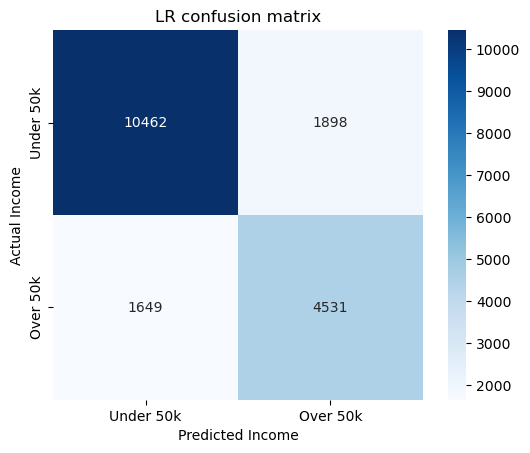

In [16]:
lr_confusion = confusion_matrix(y_train_us, lr_us.predict(X_train_us))
# plt.figure(dpi=150)
sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Under 50k", "Over 50k"],        
    yticklabels=["Under 50k", "Over 50k"]
)

plt.xlabel('Predicted Income')
plt.ylabel('Actual Income')
plt.title('LR confusion matrix');

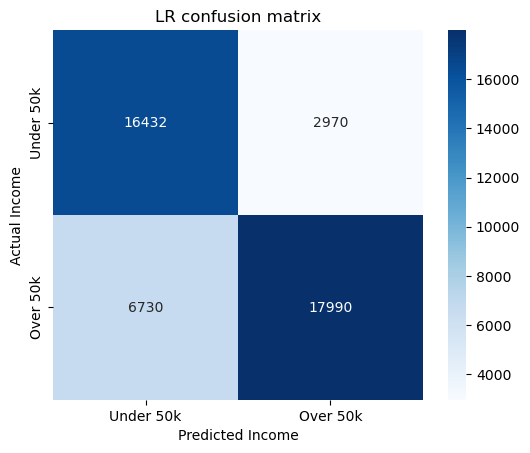

In [17]:
# Print confusion matrix for kNN
lr_confusion = confusion_matrix(y_train_os, lr_os.predict(X_train_os))
# plt.figure(dpi=150)
sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Under 50k", "Over 50k"],        
    yticklabels=["Under 50k", "Over 50k"]
)

plt.xlabel('Predicted Income')
plt.ylabel('Actual Income')
plt.title('LR confusion matrix');

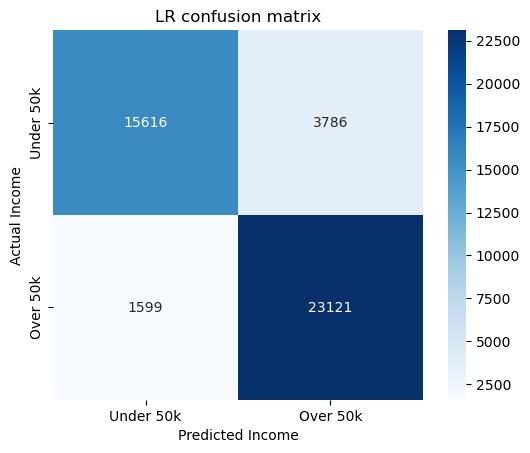

In [18]:
# Print confusion matrix for kNN
lr_confusion = confusion_matrix(y_train_smt, lr_smt.predict_proba(X_train_smt)[:, 1] > .42)
# plt.figure(dpi=150)
sns.heatmap(
    lr_confusion, 
    cmap="Blues",  
    annot=True, 
    fmt="g",
    square=True,
    xticklabels=["Under 50k", "Over 50k"],        
    yticklabels=["Under 50k", "Over 50k"]
)

plt.xlabel('Predicted Income')
plt.ylabel('Actual Income')
plt.title('LR confusion matrix');

## Assignment 2: Class Weights

1. Fit a regression with standard, balanced and 4:1 (minority vs majority) class weights. Calculate the AUC for each.
2. For the weighting that had the best AUC, tune the threshold to maximize F1 score.


In [19]:
lr = LogisticRegression(max_iter=5000)

lr_balanced = LogisticRegression(class_weight = "balanced", max_iter=5000)

lr_4x = LogisticRegression(class_weight = {1:4, 0:1}, max_iter=5000)

In [20]:
y_train.mean()

0.2415761082010789

In [21]:
# equally weighted model (default) 
lr.fit(X_train, y_train)

# multiplies minority by common:rare ratio
lr_balanced.fit(X_train, y_train)

# 4x weight (4x minority)
lr_4x.fit(X_train, y_train)

LogisticRegression(class_weight={0: 1, 1: 4}, max_iter=5000)

In [22]:
lr.score(X_test, y_test)

0.8544402751719825

In [23]:
lr_balanced.score(X_test, y_test)

0.8072232645403377

In [24]:
lr_4x.score(X_test, y_test)

0.7879924953095685

In [25]:
from sklearn.metrics import roc_curve, auc

y_probs = lr.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
auc_score = auc(fpr, tpr)

print(f"Standard Weight AUC: {auc_score}")

y_probs = lr_balanced.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
auc_score = auc(fpr, tpr)

print(f"Balanced Weight AUC: {auc_score}")

y_probs = lr_4x.predict_proba(X_train)[:, 1]
fpr, tpr, thresholds = roc_curve(y_train, y_probs)
auc_score = auc(fpr, tpr)

print(f"4x Weight AUC: {auc_score}")

Standard Weight AUC: 0.9041889886239334
Balanced Weight AUC: 0.9047560655842707
4x Weight AUC: 0.9064860777372901


<Axes: >

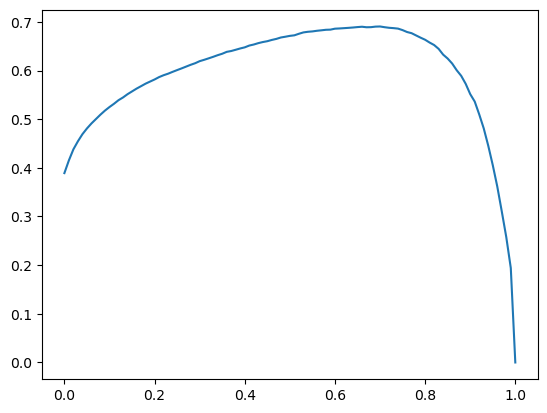

In [26]:
from sklearn.metrics import f1_score

f1 = []

thresholds = np.linspace(0, 1, 101)

for thresh in thresholds:
    y_pred =(lr_4x.predict_proba(X_train)[:,1]>thresh)
    f1.append(f1_score(y_train, y_pred))
    
sns.lineplot(x=thresholds, y=f1)


In [27]:
thresh = thresholds[f1.index(max(f1))]

thresh

0.7000000000000001

In [28]:
print(f"4x F1: {f1_score(y_train, lr_4x.predict_proba(X_train)[:, 1] > thresh)}")

4x F1: 0.6904889433009411


In [29]:
from sklearn.metrics import precision_score,recall_score,f1_score


print(f"F1: {f1_score(y_train, lr.predict(X_train))}")
print(f"F1 Balanced: {f1_score(y_train, lr_balanced.predict(X_train))}")
print(f"F1 4x: {f1_score(y_train, lr_4x.predict(X_train))}")

F1: 0.6594517874567551
F1 Balanced: 0.6775388213891235
F1 4x: 0.671185605126941
